In [1]:
import os
import sys

# Add .. to the list of available Python packages to include the docknet package
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.insert(0, module_path)

In [2]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt

from docknet.net import Docknet
from docknet.data_generator.chessboard_data_generator import ChessboardDataGenerator
from docknet.initializer.random_normal_initializer import RandomNormalInitializer
from docknet.optimizer.gradient_descent_optimizer import GradientDescentOptimizer
from docknet.optimizer.adam_optimizer import AdamOptimizer

In [3]:
def scatterplot(axe, X, Y, title, files, rows, index, x0_range, x1_range):
    axe.scatter(X[0, :], X[1, :], c=Y[0:], s=2)
    aspect = (x0_range[1] - x0_range[0]) / (x1_range[1] - x1_range[0])
    axe.set_aspect(aspect)
    axe.set_title(title)
    axe.set_xlim(x0_range)
    axe.set_ylim(x1_range)
    axe.set_xlabel('x0')
    axe.set_ylabel('x1')

In [4]:
train_size = 2000
test_size = 400
x0_range = (-5., 5.)
x1_range = (-5., 5.)

In [5]:
data_generator = ChessboardDataGenerator(x0_range, x1_range)
X_train, Y_train = data_generator.generate_balanced_shuffled_sample(train_size)
X_test, Y_test = data_generator.generate_balanced_shuffled_sample(test_size)

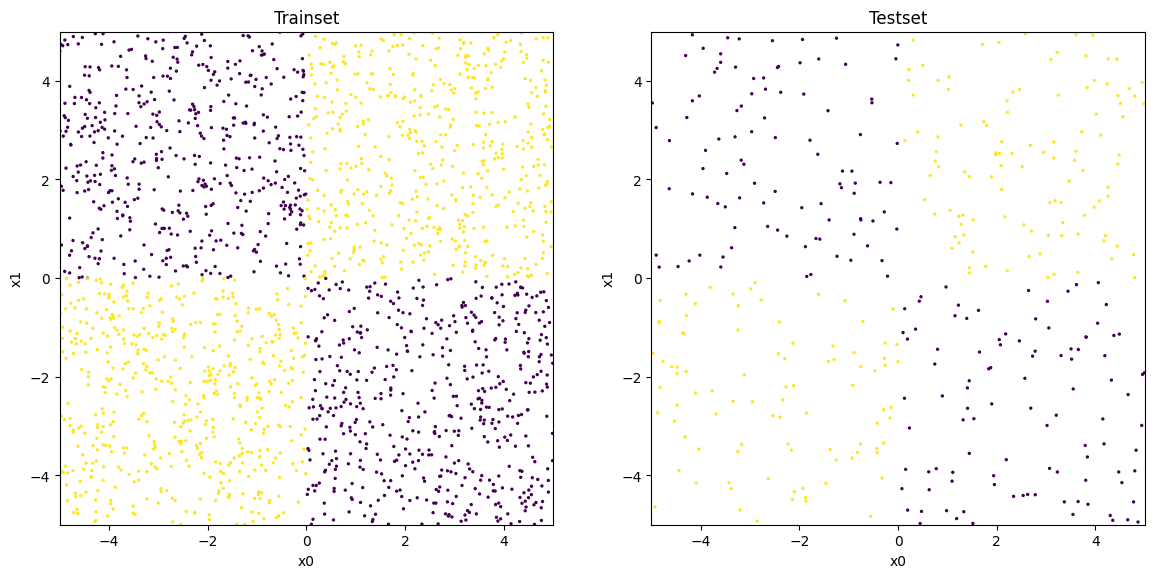

In [6]:
plt.rcParams['figure.figsize'] = [14, 7]
f, axes = plt.subplots(nrows=1, ncols=2)
scatterplot(axes[0], X_train, Y_train, 'Trainset', 1, 2, 1, x0_range, x1_range)
scatterplot(axes[1], X_test, Y_test, 'Testset', 1, 2, 2, x0_range, x1_range)
plt.show()

In [7]:
docknet = Docknet()
docknet.add_input_layer(2)
docknet.add_dense_layer(6, 'relu')
docknet.add_dense_layer(1, 'sigmoid')
docknet.initializer = RandomNormalInitializer()
docknet.cost_function = 'cross_entropy'
docknet.optimizer = AdamOptimizer()

In [8]:
np.random.seed(1)
epochs = 400
batch_size = round(train_size / 10.)
epoch_errors, iteration_errors = docknet.train(X_train, Y_train, batch_size, max_number_of_epochs=epochs)

Loss after epoch 1: 0.6763420544332962
Loss after epoch 2: 0.58619697695983
Loss after epoch 3: 0.45986736906277814
Loss after epoch 4: 0.36585371960295676
Loss after epoch 5: 0.3124300818690241
Loss after epoch 6: 0.2794350888818338
Loss after epoch 7: 0.25679931074525963
Loss after epoch 8: 0.23971467809399621
Loss after epoch 9: 0.22599603051952347
Loss after epoch 10: 0.2146794597163783
Loss after epoch 11: 0.20501187255473188
Loss after epoch 12: 0.19667444845232865
Loss after epoch 13: 0.1893472623316021
Loss after epoch 14: 0.1828115025654547
Loss after epoch 15: 0.17696426208530622
Loss after epoch 16: 0.17169429330341884
Loss after epoch 17: 0.1669021240996475
Loss after epoch 18: 0.16253499838835433
Loss after epoch 19: 0.15852384900371325
Loss after epoch 20: 0.15481064550976922
Loss after epoch 21: 0.15137994325842075
Loss after epoch 22: 0.1481994968049049
Loss after epoch 23: 0.14523712020955823
Loss after epoch 24: 0.14247706675199673
Loss after epoch 25: 0.1398986719108

Loss after epoch 200: 0.061182502323754086
Loss after epoch 201: 0.061066017427516814
Loss after epoch 202: 0.0609503057786095
Loss after epoch 203: 0.060835389228663134
Loss after epoch 204: 0.06072121618105996
Loss after epoch 205: 0.060607735029598445
Loss after epoch 206: 0.060494855479806785
Loss after epoch 207: 0.060382730406042286
Loss after epoch 208: 0.06027115736822953
Loss after epoch 209: 0.060160507796375225
Loss after epoch 210: 0.06005032584434929
Loss after epoch 211: 0.05994091682412633
Loss after epoch 212: 0.05983237235690197
Loss after epoch 213: 0.05972472178719683
Loss after epoch 214: 0.05961778081751051
Loss after epoch 215: 0.05951116045220084
Loss after epoch 216: 0.05940541283270837
Loss after epoch 217: 0.059300171717185275
Loss after epoch 218: 0.05919538967660771
Loss after epoch 219: 0.05909117077665984
Loss after epoch 220: 0.0589876314147773
Loss after epoch 221: 0.05888478706559077
Loss after epoch 222: 0.05878258604728934
Loss after epoch 223: 0.0586

Loss after epoch 394: 0.046943598432506055
Loss after epoch 395: 0.04689329220621499
Loss after epoch 396: 0.04684667273854491
Loss after epoch 397: 0.04679850750585259
Loss after epoch 398: 0.04675105536264982
Loss after epoch 399: 0.04670366654365129
Loss after epoch 400: 0.04665528611968635


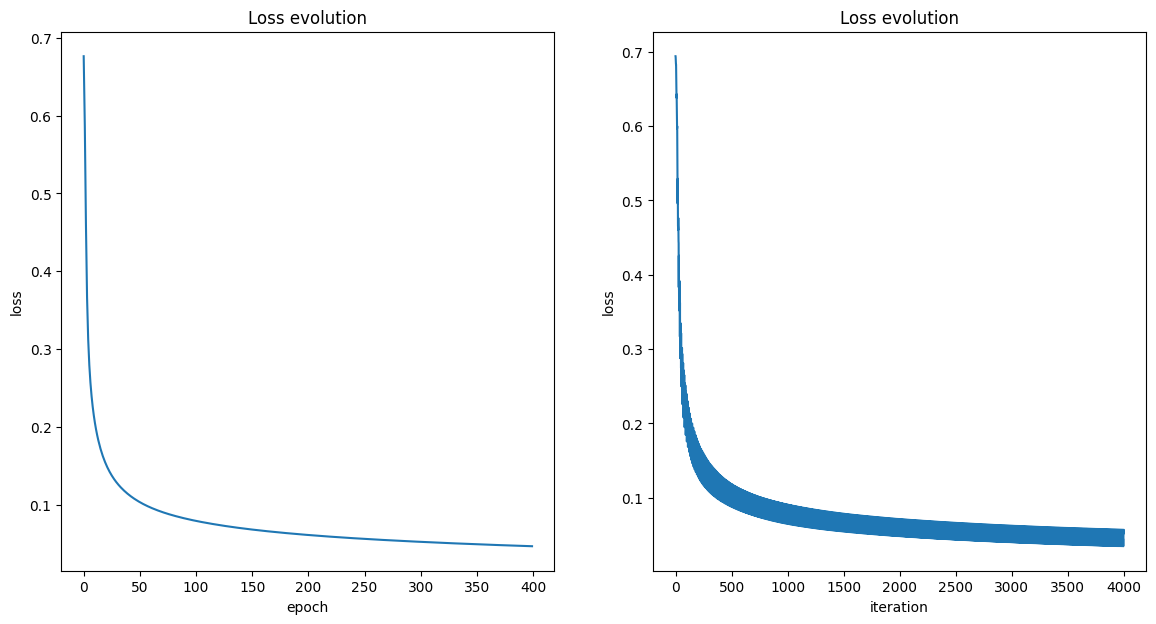

In [9]:
plt.subplot(1, 2, 1)
plt.plot(epoch_errors)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Loss evolution')
plt.subplot(1, 2, 2)
plt.plot(iteration_errors)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.title('Loss evolution')
plt.show()

In [10]:
Y_predicted = docknet.predict(X_test)
Y_predicted = np.round(Y_predicted)
correct = Y_predicted == Y_test
wrong = Y_predicted != Y_test
X_correct = X_test[:, correct.reshape(test_size)]
Y_correct = Y_test[correct]
X_wrong = X_test[:, wrong.reshape(test_size)]
Y_wrong = Y_test[wrong]

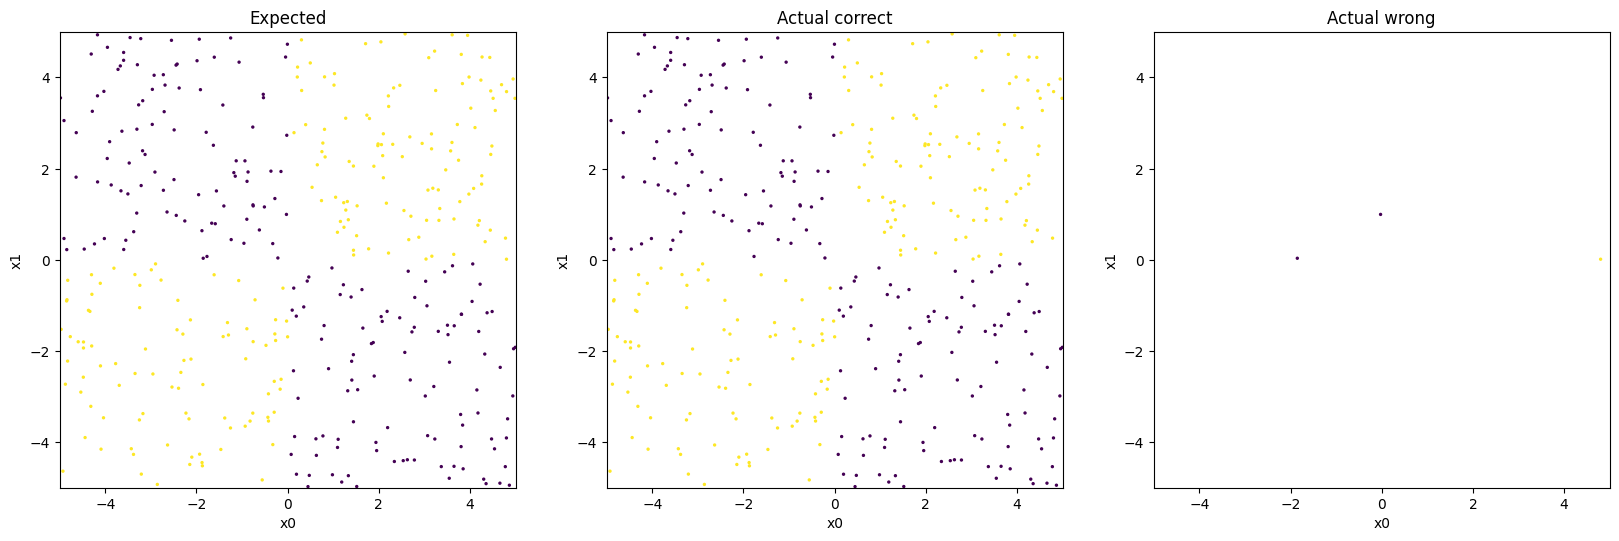

In [11]:
plt.rcParams['figure.figsize'] = [20, 10]
f, axes = plt.subplots(nrows=1, ncols=3)
scatterplot(axes[0], X_test, Y_test, 'Expected', 1, 3, 1, x0_range, x1_range)
scatterplot(axes[1], X_correct, Y_correct, 'Actual correct', 1, 3, 2, x0_range, x1_range)
scatterplot(axes[2], X_wrong, Y_wrong, 'Actual wrong', 1, 3, 3, x0_range, x1_range)
plt.show()

In [12]:
results = metrics.classification_report(Y_test[0], Y_predicted[0])
print(results)

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       200
         1.0       0.99      0.99      0.99       200

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [13]:
conf_matrix = metrics.confusion_matrix(Y_test[0], Y_predicted[0])
print(conf_matrix)

[[198   2]
 [  1 199]]
